# Week-17 Homework Assignment

### 1.	What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

In [ ]:
#### Inductive reasoning:
Inductive reasoning, its like looking for a pattern or trend and then generalizing the information based on what is known 
or observed.

Example: When shopping online, we select the product and inference the product quality based on the reviews and rating. In 
    the same way we choose to watch movies based on IMDB ratings

####    Deductive reasoning:
Deductive reasoning, is taking some set of data or some set of facts and using that to come up with other, or deducing some
other facts that you know are true. when you generalize you don't know necessarily whether the trend will continue, but you
assume it will, you don't know 100% it will be true but,with deductive reasoning you know it will be true.

Example: when you have a 9:00am appointment with Doctor and you know that it takes 30 minutes to drive from home to the 
       hospital. From those two facts, you deduce that you will have to leave your home by 8:30am to be on time.


## Abalone Dataset

### Data set description

The dataset used is Abalone Data set. This dataset is from UCI Machine Learning Repository.
The source of the data is from original study in this link
Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone.
        
The main goal is to explore three different Supervised Learning Algorithms: 
Decision Trees, Random Forest and XGBoost.

The focus is on predicting the age of Abalone. In general, the age is determined by cutting the shell through the cone, staining after that, and counting the number of rings present through the microscope.

The dataset has 4177 instances. There are no missing values in this data set as per the description given.



Using ONE of the following sources, complete the questions for only that source. 

Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

6.	Which model performed best? What is your performance metric? Why? 


## Data Pre-processing

In [51]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [52]:
# import the dataset (Ablone dataset)
target_url = (r"A:\launch_code_STL\Final_Homework\week-17\abalone.data")


In [53]:
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
# checking for any null values in the dataset
abalone.isnull().sum(axis = 0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

we can see there are no null values in the dataset as per the description given in the documentation.

In [55]:
# checking for statistics of the dataset
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


from the above statistics  we can see, the feature Height is having the minimum value as '0'. There are some zero values 
in height feature so checking the 'height' feature.

In [56]:
abalone['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [57]:
abalone[abalone.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are only two rows with zero values. We can remove these two rows from our dataset and consider the rest of the data
for the model.

In [58]:
abalone_df = abalone[abalone.Height != 0]
abalone_df.describe()
abalone_df['Height'].describe()

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

<AxesSubplot:>

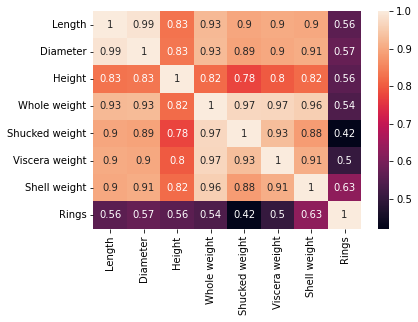

In [59]:
# checking for the correlation of the dataset
abalone_df.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(abalone_df.corr(), annot = True)

In [60]:
abalone_df.isna().sum()
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


<Figure size 864x720 with 0 Axes>

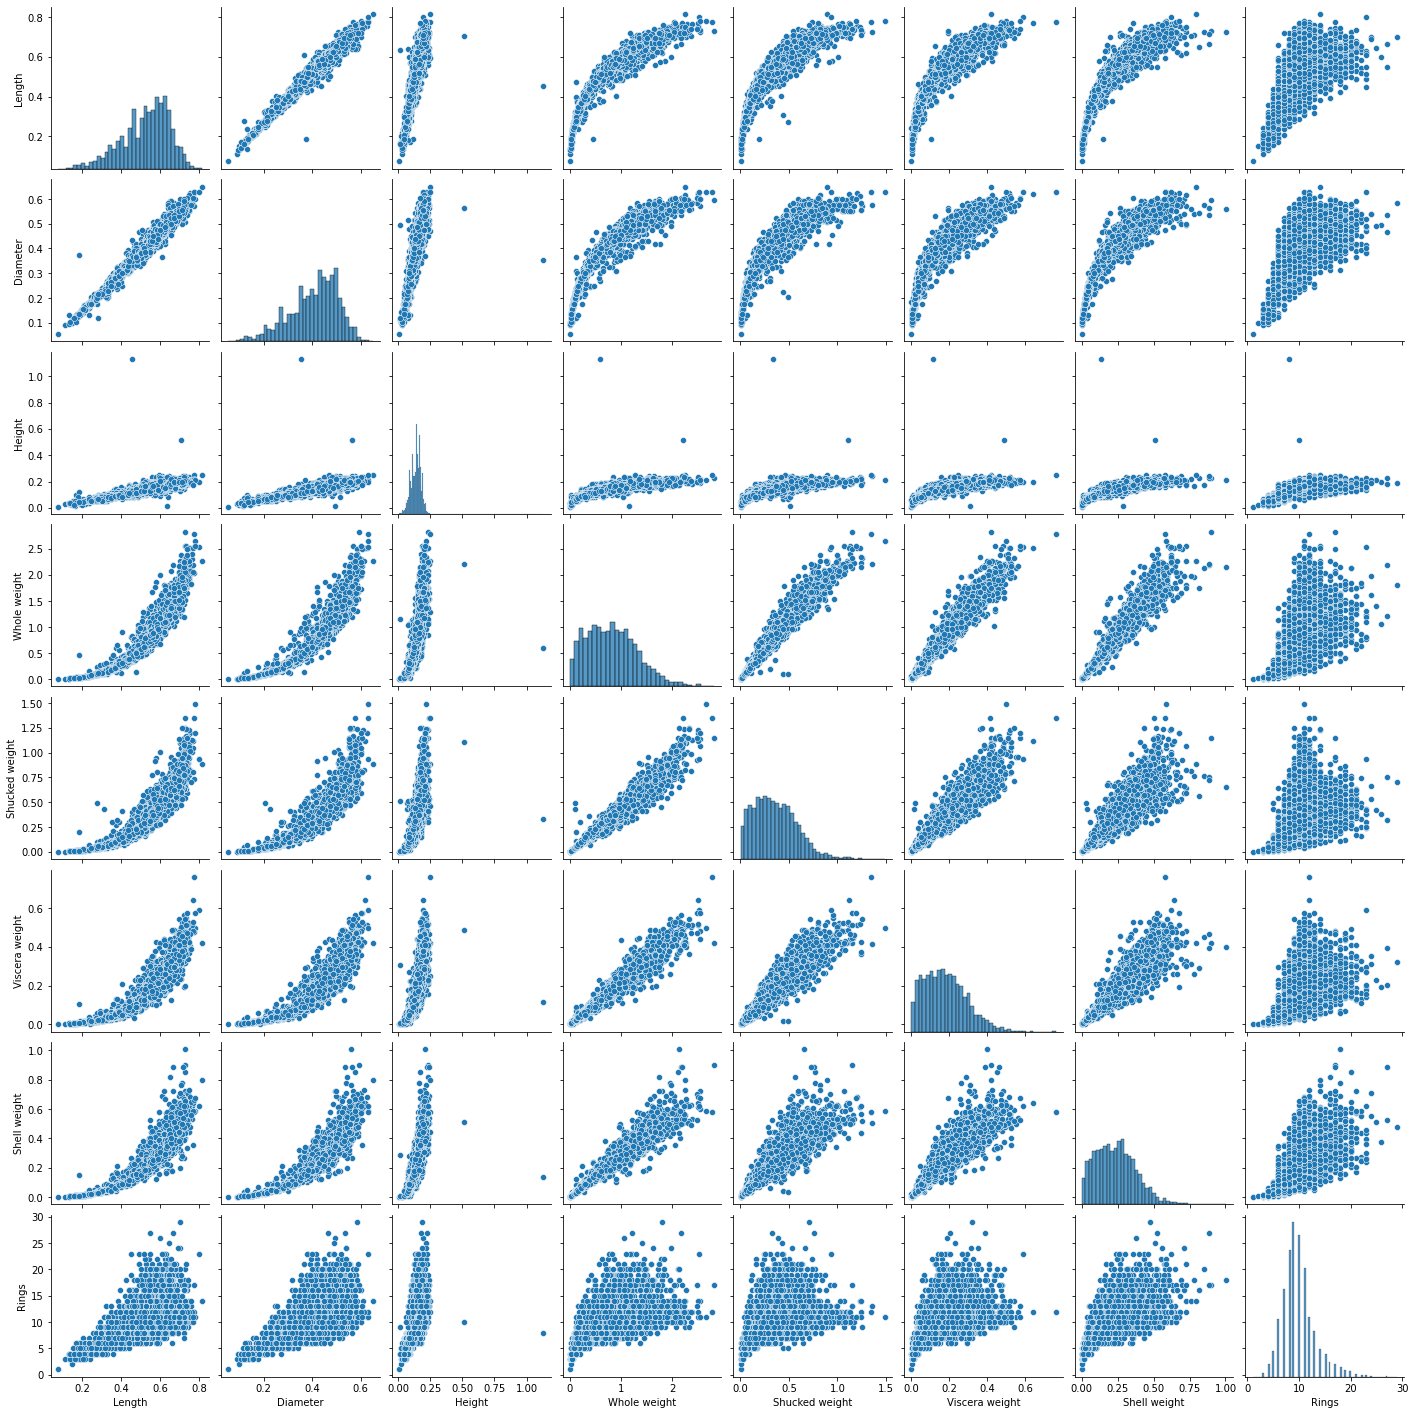

In [61]:
#plotting a pair plot to check
plt.figure(2, figsize = (12, 10))
sns.pairplot(abalone_df)

In [62]:
# From the information given by the df.info(), there is one categorical variable(sex). 
# A count plot is plotted to see how the categories are distributed on all the samples.

<AxesSubplot:xlabel='Sex', ylabel='count'>

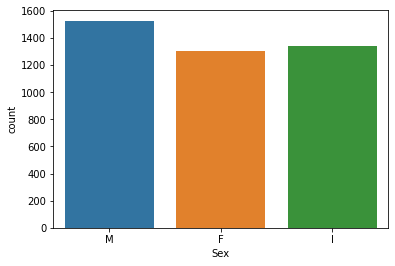

In [63]:
#we have one categorical variable. ('Sex')
#plotting to check how many categories for 'Sex' variable
sns.countplot(abalone_df.Sex)

In [64]:
# The above plot infers that the males dominate the other categories. This feature is explored more considering Rings feature.

<Figure size 864x720 with 0 Axes>

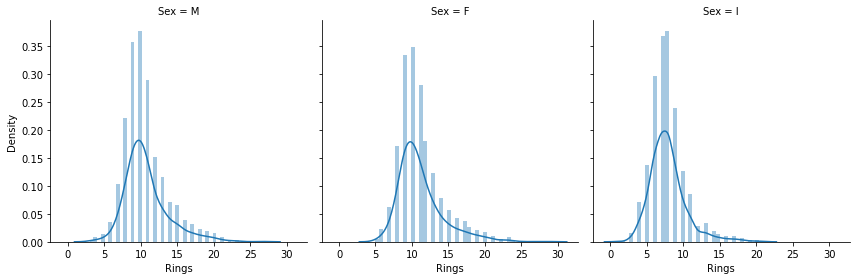

In [65]:
#exploring the sex columns more
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = abalone_df, col= 'Sex', height = 4)
g.map(sns.distplot, 'Rings')

In [66]:
# Label Encoding
# dummy columns are created for the categories in Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abalone_df['Sex'] = le.fit_transform(abalone_df.Sex)
 #the dummy columns are included in df now

In [67]:
# As mentioned in the description, the age column can be formed by adding number 1.5 to rings feature.
# This is done and added into the main data frame because, the task is to predict the age.
#A count plot is drawn to visualize the age distribution on the data

<AxesSubplot:xlabel='Age', ylabel='count'>

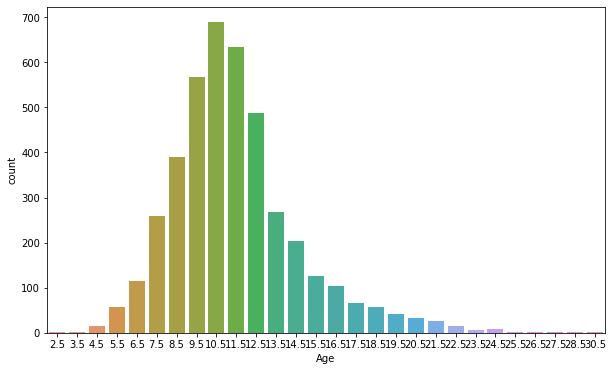

In [68]:
# #as per description age = number of rings + 1.5
abalone_df['Age'] = abalone_df.Rings + 1.5
abalone_df['Age'].describe()
#lets check the age plot
plt.figure(4, figsize=(10, 6))
sns.countplot(abalone_df['Age'])

In [20]:
#The plot says that the age group of 7.5 and 15 has the greatest number of samples. 
# The age feature is divided into two classed. 0 is considered as young and if age is less than 8. 1 is considered old
#and if age is greater than 8.

In [69]:
# AgeValues = abalone_df['Age'].values
# AgeIndex = []
# # 0 is young, 1 is old
# for age in AgeValues:
#     if age <8:
#         AgeIndex.append('0')
#     else:
#         AgeIndex.append('1')

# AgeIndex = pd.DataFrame(data = AgeIndex, columns = ['AgeIndex'])
# abalone_df.reset_index(drop=True, inplace=True)
# AgeIndex.reset_index(drop = True, inplace = True)
# newDf = pd.concat([abalone_df, AgeIndex], axis = 1)

# plt.figure(5)
# sns.countplot(newDf['AgeIndex'])

In [73]:
# newDf.drop(['AgeIndex', 'Sex'], axis = 1, inplace = True)
# y = AgeIndex.values
# print(newDf)

In [74]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(abalone_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size=0.3)

In [75]:
# from sklearn.svm import SVC
# svcModel = SVC()
# svcModel.fit(X_train, y_train)

# y_pred = svcModel.predict(X_test)


# from sklearn.metrics import accuracy_score, confusion_matrix
# accuracyScore = accuracy_score(y_test, y_pred)
# confusionMatrix = confusion_matrix(y_test, y_pred)

# print(f'Accuracy Score: {accuracyScore}')
# print(f'Confusion Matrix: \n{confusionMatrix}')

In [76]:
# from sklearn.model_selection import GridSearchCV
# params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
# svcClf = GridSearchCV(svcModel, param_grid = params, scoring = 'accuracy', cv = 10)
# svcClf.fit(X_train, y_train)
# #
# # best parameters and also the best score
# print("Tuned Linear Regression Parameters: {}".format(svcClf.best_params_))
# print("Best score is {}".format(svcClf.best_score_))

In [77]:
# #kfold cross validation
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(svcModel, X, y, cv=10) 
# avgScore = scores.mean()
# print("The Average Accuracy Score of the model with 10k folds", avgScore)

In [78]:
# y = newDf["Rings"]
# X = newDf.drop(columns="Rings")

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [79]:
# # Import DecisionTreeClassifier, accuracy_score and mean_squared_error
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import mean_squared_error as MSE


# dt = DecisionTreeClassifier(random_state=20, max_depth = 10)
# # training classifier
# dt.fit(X_train, y_train)

# y_pred = dt.predict(X_test)

# # Evaluate the test set RMSE
# rmse_test = MSE(y_test, y_pred)**(1/2)

# # Print rmse_test
# print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

# # Compute test set accuracy  
# acc = accuracy_score(y_test, y_pred)
# print("Test set accuracy: {:.2f}".format(acc))

In [88]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Initializing classifier(random_state is to ensure same results in every execution, max_depth is to specify number of splits)
model = DecisionTreeRegressor(max_depth=10,random_state=20)

# fit classifier to the data
model.fit(X_train, y_train)

# apply the model to the test data
y_pred = model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of dt: {:.2f}'.format(rmse_test))

# #evaluating model on train set
# kfold = KFold(n_splits = 5)
# cv_results = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv = kfold)

Test set RMSE of dt: 0.08


In [83]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)

Mean Absolute Error 0.0039904229848363925
Mean Squared Error 0.007182761372705506
R2 Score 0.9993312459652077


In [84]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Instantiate rf
rf = RandomForestRegressor()
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred_train = rf.predict(X_train)

#evaluating model on train set
kfold = KFold(n_splits = 5)
cv_results = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv = kfold)

In [85]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)

Mean Absolute Error 0.004988028731045484
Mean Squared Error 0.008322186751795687
R2 Score 0.9992251592834885


In [46]:
#%% Regression model (linear Regressor)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

regModel = LinearRegression()
regModel.fit(X_train, y_train)

y_pred_train = regModel.predict(X_train)
#evaluating model on train set
kfold = KFold(n_splits = 5)
cv_results = cross_val_score(regModel, X_train, y_train, scoring='neg_mean_squared_error', cv = kfold)

In [47]:
y_pred_train = regModel.predict(X_train)
y_pred = regModel.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)

Mean Absolute Error 2.0901444248032885e-15
Mean Squared Error 8.556542776750543e-30
R2 Score 1.0


In [90]:
#XGBoost
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
# print(classification_report(y_test, y_pred))

[21:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
y_pred_train = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)

Mean Absolute Error 0.007182761372705506
Mean Squared Error 0.024740622505985636
R2 Score 0.9976965138801599
